<b><font size=20, color='#A020F0'>AOS573 Final Project</font></b>

#### Matt Oehler

### Project Overview
The goal of this project is to be able to read in NEXRAD level II archive radar data from the [NWS database](https://s3.amazonaws.com/noaa-nexrad-level2/index.html), filter out lower reflectivities (<30dbz), and track the most intense part of the storms as they move and develop in time. The package doing most of the heavy lifting will be [Py-ART](https://arm-doe.github.io/pyart/), Python ARM (Atmospheric Radiation Measuting) Radar Toolkit. This meant learning a new (and quite in depth I might add) Python package, all its cababilities, and how *friendly* it is with other packages.

For this study, we will be observing a storm that hit the Twin Cities area the evening of August 26th, 2024. To set the scene, a hot and humid air mass settled across the region beginning Sunday, August 25 and lasting through Monday, August 26. On Monday afternoon, heat indices exceed 100 degrees in many locations. This warm, unstable air was followed by two rounds of severe weather over the next 12 hours. On Monday afternoon, thunderstorms developed across western Minnesota, and formed into a line producing wind damage across central and eastern Minnesota, and western Wisconsin. Later that night into Tuesday morning, another round of storms developed and produced wind damage in eastern Minnesota and western Wisconsin. [News sources](https://www.cbsnews.com/minnesota/pictures/minnesota-state-fair-storm-damage-aug-27-2024/4/) stated that it did the unprecedented and forced the beloved Minnesota State Fair to open late on Tuesday.
?

In [15]:
import pyart
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
# import tensorflow 
from copy import deepcopy
import math

In these next few cells, we read in 2 frames of data from the NWS database and remove any unnecessary fields as well as create a gate filter to remove lower reflectivities. That gate filter is then applied to both frames and the new filtered reflectivity is added in as a field titled filtered_reflectivity.

In [16]:
#Import frames of data
aws_nexrad_level2_file = ("s3://noaa-nexrad-level2/2024/08/26/KMPX/KMPX20240826_215132_V06")
aws_nexrad_level2_file2 = ("s3://noaa-nexrad-level2/2024/08/26/KMPX/KMPX20240826_215759_V06")

#Read the data into a usable format and exclude unnecessary fields
radar = pyart.io.read_nexrad_archive(aws_nexrad_level2_file, exclude_fields=('cross_correlation_ratio',
 'differential_reflectivity',
 'velocity',
 'clutter_filter_power_removed',
 'spectrum_width',
 'differential_phase'))
radar2 = pyart.io.read_nexrad_archive(aws_nexrad_level2_file2, exclude_fields=('cross_correlation_ratio',
 'differential_reflectivity',
 'velocity',
 'clutter_filter_power_removed',
 'spectrum_width',
 'differential_phase'))

#List radar variables in data
list(radar.fields)

['reflectivity']

In [17]:
# Create gatefilter and copy reflectivity field
gatefilter = pyart.correct.GateFilter(radar)
gatefilter2 = pyart.correct.GateFilter(radar2)
gatefilter.exclude_below('reflectivity', 30)
gatefilter2.exclude_below('reflectivity', 30)
dc1 = deepcopy(radar.fields['reflectivity'])
dc2 = deepcopy(radar2.fields['reflectivity'])

# Apply gatefilter to coppied field and add field to data
dc1['data'] = np.ma.masked_where(gatefilter.gate_excluded, dc1['data'])
radar.add_field('filtered_reflectivity', dc1, replace_existing=True)
dc2['data'] = np.ma.masked_where(gatefilter2.gate_excluded, dc2['data'])
radar2.add_field('filtered_reflectivity', dc2, replace_existing=True)

#List radar variables in data
list(radar.fields)

['reflectivity', 'filtered_reflectivity']

Next we plot unfiltered reflectivity from the 2 frames of data. This gives us an idea of what we're looking at. Below those frames, we plot the filtered reflectivities

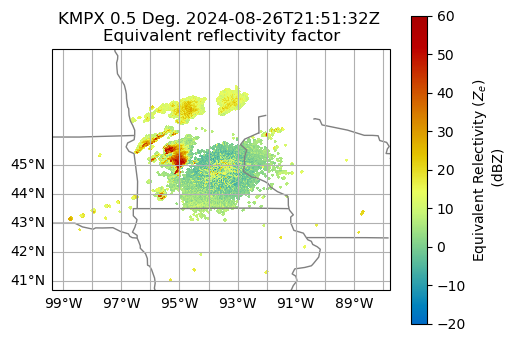

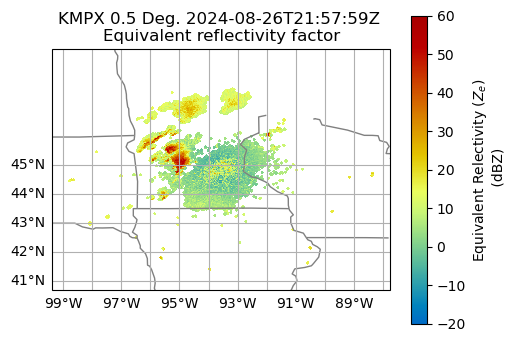

In [18]:
#plot reflectivity for frame 1
fig = plt.figure(figsize=(12, 4))
display = pyart.graph.RadarMapDisplay(radar)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

display.plot_ppi_map(
    "reflectivity",
    sweep=0,
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

#plot reflectivity for frame 2
fig = plt.figure(figsize=(12, 4))
display = pyart.graph.RadarMapDisplay(radar2)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

display.plot_ppi_map(
    "reflectivity",
    sweep=0,
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

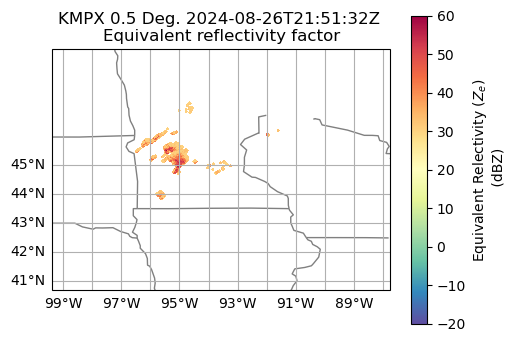

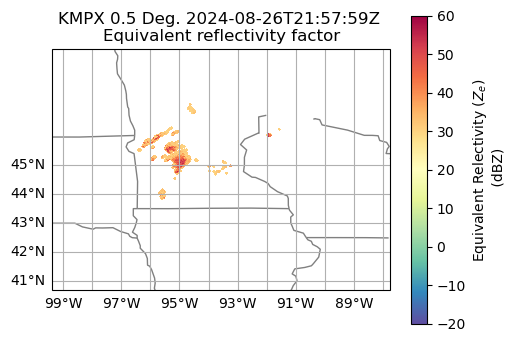

In [19]:
#plot filtered relectivity values for frame 1(30 dbz or greater)
fig = plt.figure(figsize=(12, 4))
display = pyart.graph.RadarMapDisplay(radar)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

display.plot_ppi_map(
    'filtered_reflectivity',
    sweep=0,
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

#plot filtered relectivity values for frame 2(30 dbz or greater)
fig = plt.figure(figsize=(12, 4))
display = pyart.graph.RadarMapDisplay(radar2)

ax = plt.subplot(121, projection=ccrs.PlateCarree())

display.plot_ppi_map(
    'filtered_reflectivity',
    sweep=0,
    ax=ax,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    vmin=-20,
    vmax=60,
)

Below is the first attempt at retrieving the latittude and longitude values for the points showing a reflectivity. A function is required to do this as the lat/lon information stored within data only has one point, the location of the radar. The funtion was originally working fine and I was manipulating the data in an attempt to recreate the plots above and ensure the function was working correctly. Unfortunately, now it will not run without killing the kernal and therefore I changed my approach. I'm not sure what changed and I have attempted to do the same thing a few different ways but to no avail.

In [20]:
# Get lat/lon points using function
# latlon = radar.get_gate_lat_lon_alt(0)

# Separate lat/lon into individual variables
# lat = list(latlon[0])
# lon = list(latlon[1])

In [21]:
# Lat,Lon, and reflectivity currently an array of sub-arrays, flatten to 1D
# lat_flat = np.concatenate(lat).ravel()
# lon_flat = np.concatenate(lon).ravel()
# data = radar.fields['reflectivity']['data'].data
# ref = np.concatenate(data).ravel()

# Filter lat/lon to where the filtered reflectivity resides
# lat_filt = np.where(radar.fields['reflectivity']['data'].data > 30, lat, np.nan)
# lon_filt = np.where(radar.fields['reflectivity']['data'].data > 30, lon, np.nan)

Due to troubles getting the latitude/longitude function to run, I switched to a polar method using the range and azimuth angle. These values already resided within the data unlike the lat/lon coordinates. Below are the plots of reflectivity and filtered reflectivity utilizing a polar plot. This gives us something to compare our recreated plots to later as a way to check our work.

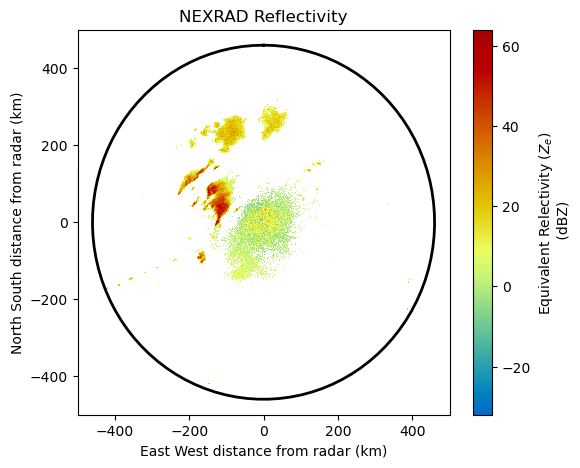

In [22]:
# Plot radar reflectivity in polar coordinates
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(121, projection=ccrs.PlateCarree())

# plot super resolution reflectivity
ax = fig.add_subplot(111)
display.plot(
    "reflectivity",
    0,
    title="NEXRAD Reflectivity",
    vmin=-32,
    vmax=64,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    ax=ax,
)
# ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black')
display.plot_range_ring(radar.range["data"][-1] / 1000.0, ax=ax)
display.set_limits(xlim=(-500, 500), ylim=(-500, 500), ax=ax)
plt.show()

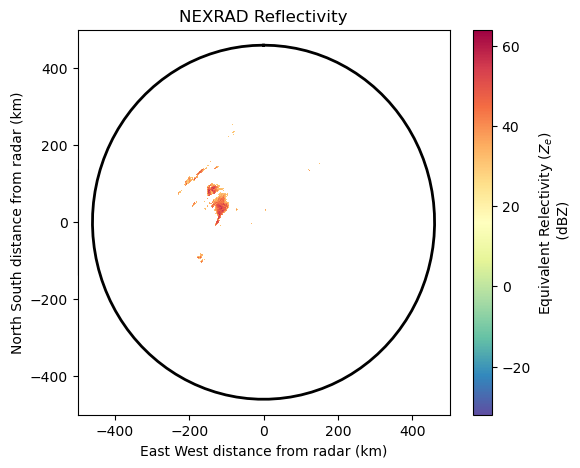

In [23]:
# Plot radar filtered reflectivity in polar coordinates
display = pyart.graph.RadarDisplay(radar )
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(121, projection=ccrs.PlateCarree())

# plot filtered reflectivity
ax = fig.add_subplot(111)
display.plot(
    "filtered_reflectivity",
    0,
    title="NEXRAD Reflectivity",
    vmin=-32,
    vmax=64,
    colorbar_label="Equivalent Relectivity ($Z_{e}$) \n (dBZ)",
    ax=ax,

)
display.plot_range_ring(radar.range["data"][-1] / 1000.0, ax=ax)
display.set_limits(xlim=(-500, 500), ylim=(-500, 500), ax=ax)
plt.show()

Here I pulled the necessary values I would need to be able to work with them in an easier way. 

In [24]:
# Extract the needed fields/data
range = radar.range['data']
data = radar.fields['reflectivity']['data'].data
ref = np.concatenate(data).ravel()
data2 = radar.fields['filtered_reflectivity']['data']
angle = radar.azimuth['data']
ref_filt = np.where(radar.fields['reflectivity']['data'] > 30, radar.fields['reflectivity']['data'], np.nan)

In [25]:
# angle_filt = np.where(filt.data[:,0] > 30, radar.azimuth['data'], np.nan)

I then graphed the data using a ploar plot in an attempt to recreate the plot of unfiltered reflectivity. This clearly didn't work as the plot looks nothing like the original. I suspect there were issues when I was flattening the data and potenially something beceame mialligned. Though that doesn't fully explain the colors produced by the plot.

In [ ]:
# Generate sample data
R, Theta = np.meshgrid(range, angle)

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},)

# Create contour plot
contour_plot = ax.contourf(Theta, R, data, cmap='pyart_HomeyerRainbow')

# Add colorbar
plt.colorbar(contour_plot)

# Set title
ax.set_title('Polar Contour Plot')

# Show plot
plt.show()